In [28]:
# Importing the PIL library
from PIL import Image, ImageDraw, ImageFont
import time
import cv2
import numpy as np
from IPython import display
import glob
import os
import re


In [3]:
# Open an Image
img = Image.open('Images/Background_Screen.png')


In [4]:
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img)


In [5]:
# Choose a font
font = ImageFont.truetype('Fonts/va-11-hall-a-6px-non-mono.ttf')
# font = ImageFont.truetype('Fonts/va-11-hall-a-6px.ttf')
# font = ImageFont.truetype('Fonts/va-11-hall-a-cyr-10px.ttf')

In [6]:
x= 100
y= 200

# Add Text to an image
I1.text((x, y), "Bonjour, l'interview va commencer",font=font )


In [7]:
def write_text(text, x, y, pathFont, sizeFont=None):
    if sizeFont : 
        font = ImageFont.truetype(pathFont, sizeFont)
    else:
        font = ImageFont.truetype(pathFont)
    I1.text((x, y), text, font=font)

In [8]:
write_text("Bonjour, l'interview va commencer", 100, 220, 'Fonts/va-11-hall-a-6px.ttf')
write_text("Bonjour, l'interview va commencer", 100, 240, 'Fonts/va-11-hall-a-cyr-10px.ttf')

In [9]:
# Display edited image
img.show()


In [29]:
def writeLetterByLetter(text, x, y, pathFont, timeToDisplay, sizeFont=None):
    timeToDisplay = timeToDisplay/len(text)
    img.save(f'Results/{0}.png')
    for i, letter in enumerate(text):
        write_text(letter, x, y, pathFont, sizeFont)
        x += 5
        display.display(img)
        img.save(f'Results/{i+1}.png')
        time.sleep(timeToDisplay)
        display.clear_output(wait=True)
        


In [44]:
def imagesToVideo(pathImages, pathVideo, fps):
    img_array = []
    for filename in sorted(glob.glob(pathImages), key=os.path.getmtime):
        print(filename)
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
    out = cv2.VideoWriter(pathVideo,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in img_array :
        out.write(i)
    out.release()

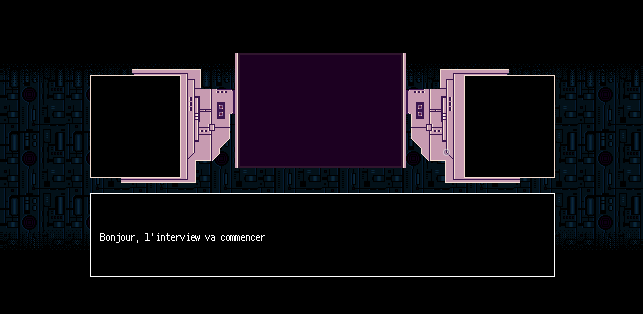

In [31]:
img = Image.open('Images/Background_Screen.png')
I1 = ImageDraw.Draw(img)
writeLetterByLetter("Bonjour, l'interview va commencer", 100, 230, 'Fonts/va-11-hall-a-6px.ttf' , 0.1)

In [45]:
# use imagesToVideo to create a vide
imagesToVideo('Results/*.png', 'Results/Video.mp4', 10)


Results\0.png
Results\1.png
Results\2.png
Results\3.png
Results\4.png
Results\5.png
Results\6.png
Results\7.png
Results\8.png
Results\9.png
Results\10.png
Results\11.png
Results\12.png
Results\13.png
Results\14.png
Results\15.png
Results\16.png
Results\17.png
Results\18.png
Results\19.png
Results\20.png
Results\21.png
Results\22.png
Results\23.png
Results\24.png
Results\25.png
Results\26.png
Results\27.png
Results\28.png
Results\29.png
Results\30.png
Results\31.png
Results\32.png
Results\33.png


In [ ]:
def writeLetterByLetterOnArray(text, x, y, pathFont, sizeFont=None):
    array_img = []
    for i, letter in enumerate(text):
        write_text(letter, x, y, pathFont, sizeFont)
        x += 5
        # transform image to cv2 format
        array_img.append(np.array(img))
    return array_img

In [ ]:
img = Image.open('Images/Background_Screen.png')
I1 = ImageDraw.Draw(img)
array_img = writeLetterByLetterOnArray("Bonjour, l'interview va commencer", 100, 230, 'Fonts/va-11-hall-a-6px.ttf')


In [35]:
# get dialogues 
DIALOGUES_PATH = 'Dialogues'
with open(os.path.join(DIALOGUES_PATH, 'test.csv'), 'r', encoding='utf-8') as f:
    all = f.read()
    lines = all.split('\n')

Dialogue = [line.split(',') for line in lines]
Dialogue

script = [re.split(r',(?=")', line) for line in all.split('\n')]
script


[['Gillian', '"Bonjour, je m\'appelle Gillian et vous ?"'],
 ['Jill', '"Bonjour, Gillian, je m\'appelle Jill."'],
 ['Gillian', '"Enchanté de faire votre connaissance Jill."'],
 ['Jill', '"Enchanté de faire votre connaissance Gillian."'],
 ['Gillian', '"Comment allez-vous Jill ?"']]

In [36]:
class Character :
    path_assets = os.path.join('Assets', 'Characters')
    mainImages = {}
    bodyPartVariantesImages = {}
    def __init__(self, name, firstMainImageName = None):
        self.name = name
        self._path_assets = os.path.join(self._path_assets, f'{name}')
        if firstMainImageName:
            self.getMainImage(firstMainImageName)
            self.mainImage = firstMainImageName
        
    
    def getMainImage(self, image_name):
        if image_name not in self.mainImages:
            try : 
                self.mainImages[image_name] = Image.open(os.path.join(self._path_assets, f'{image_name}.png'))
            except FileNotFoundError:
                self.mainImages[image_name] = None
        return self.mainImages[image_name]
    
    def getBodyPartVariantes(self, image_name):
        if image_name not in self.bodyPartVariantesImages:
            try : 
                self.bodyPartVariantesImages[image_name] = Image.open(os.path.join(self._path_assets, f'{image_name}.png'))
            except FileNotFoundError:
                self.bodyPartVariantesImages[image_name] = None
        return self.bodyPartVariantesImages[image_name]


In [ ]:
class Dialogue :
    """
    This class is a iterable object 
    This class receive a script, the script is a string of lines with the following format :
    "CharacterName,Text,TimeToDisplay,MainImageName,BodyPartVariantesName"
    The CharacterName is the name of the character
    The Text is the text to display, is under quotes
    The TimeToDisplay is the time to display the text, is optional
    The MainImageName is the name of the main image of the character, is optional
    The BodyPartVariantesName is the name of the body part variete image of the character, is optional

    The format of optional parameters is :
    time:TimeToDisplay 
    main:MainImageName
    body:BodyPartVarianteName

    The result of the each iteration is a tuple of 4 elements :
    - The first element is the character name
    - The second element is the text to display
    - The third element is a image of the character
    - The fourth element is the time to display the text
    """

    def __iter__(self, script):
        self.script = [re.split(r',(?=")', line) for line in script.split('\n')]
        return self

    def __next__(self):
        for line in script :
            if line[0] == '' : continue
            character = line[0]
            text = line[1]
            time = None
            mainImage = None
            bodyPartVariantes = None
            if len(line) > 2:
                for option in line[2:]:
                    if option.startswith('time:'):
                        time = float(option[5:])
                    elif option.startswith('main:'):
                        mainImage = option[5:]
                    elif option.startswith('body:'):
                        bodyPartVariantes = option[5:]
            character = Character(character)
            if mainImage:
                character.getMainImage(mainImage)
            if bodyPartVariantes:
                character.getBodyPartVariantes(bodyPartVariantes)
            raise (character, text, time)
        raise StopIteration